## Business Understanding 

In this project, I address two key business questions for a real estate company by applying machine learning to historical property data. The goal is to support real estate agents with accurate, data-driven insights to optimize pricing strategies and sales processes.

Use Case 1 : Predecting House Sale Price 

The objective is to build a regression model to predict the sale price of a house based on its physical attributes, location and condition.

Use Case 2 : Predecting Sale Type 

The objective is to build a classification model to predict the likely type of sale for a property (e.g., normal sale, new home, condition-based sale), based on its characteristics.


## Data Understanding 

### Importing necessary packages 

In [1]:
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.decomposition import PCA

from sklearn.model_selection import KFold

In [2]:
# load the data 
df = pd.read_csv("Data.csv", index_col='id')

In [3]:
df.shape

(1460, 80)

In [4]:
df.columns

Index(['sub_ms_class', 'zoning_ms', 'frontge_lot', 'area_lot', 'streetname',
       'alleyname', 'shape_lot', 'contour_land', 'util', 'configlot',
       'slopeland', 'neighborhood', 'c1', 'c2', 'type_building', 'style_house',
       'ovl_quality', 'ovl_condition', 'year_constructed', 'year_remod',
       'roof_style', 'roofmatl', 'ext1', 'ext2', 'masvnrtype', 'masvnrarea',
       'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc',
       'centralair', 'electrical', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'functional', 'fireplaces', 'fireplacequ', 'garagetype', 'garageyrblt',
       'garagefinish', 'garagecars', 'garagearea', 'garagequal', 'garagecond',
       'paveddrive', 'wooddecks

In [5]:
df.head()

,sub_ms_class,zoning_ms,frontge_lot,area_lot,streetname,alleyname,shape_lot,contour_land,util,configlot,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
id,,,,,,,,,,,,,,,,,,,,,
128,45,RM,55.0,4388,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,87000
456,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2007,WD,Normal,175500
1324,30,RL,50.0,5330,Pave,NaN,Reg,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,82500
218,70,RM,57.0,9906,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Family,107000
1182,120,RM,64.0,5587,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2008,New,Partial,392500


In [6]:
# data types 
df.dtypes

sub_ms_class       int64
zoning_ms         object
frontge_lot      float64
area_lot           int64
streetname        object
                  ...   
mosold             int64
yrsold             int64
saletype          object
salecondition     object
saleprice          int64
Length: 80, dtype: object

In [7]:
# Summary stats for numerical columns
df.describe()

,sub_ms_class,frontge_lot,area_lot,ovl_quality,ovl_condition,year_constructed,year_remod,masvnrarea,bsmtfinsf1,bsmtfinsf2,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Group column types 

df.select_dtypes(include='number').columns
df.select_dtypes(include='object').columns

Index(['zoning_ms', 'streetname', 'alleyname', 'shape_lot', 'contour_land',
       'util', 'configlot', 'slopeland', 'neighborhood', 'c1', 'c2',
       'type_building', 'style_house', 'roof_style', 'roofmatl', 'ext1',
       'ext2', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')

### Numerical columns Exploration

In [9]:
numerical_cols = list(df.select_dtypes(include = 'number').columns)

In [10]:
numerical_cols

['sub_ms_class',
 'frontge_lot',
 'area_lot',
 'ovl_quality',
 'ovl_condition',
 'year_constructed',
 'year_remod',
 'masvnrarea',
 'bsmtfinsf1',
 'bsmtfinsf2',
 'bsmtunfsf',
 'totalbsmtsf',
 '1stflrsf',
 '2ndflrsf',
 'lowqualfinsf',
 'grlivarea',
 'bsmtfullbath',
 'bsmthalfbath',
 'fullbath',
 'halfbath',
 'bedroomabvgr',
 'kitchenabvgr',
 'totrmsabvgrd',
 'fireplaces',
 'garageyrblt',
 'garagecars',
 'garagearea',
 'wooddecksf',
 'openporchsf',
 'enclosedporch',
 '3ssnporch',
 'screenporch',
 'poolarea',
 'miscval',
 'mosold',
 'yrsold',
 'saleprice']

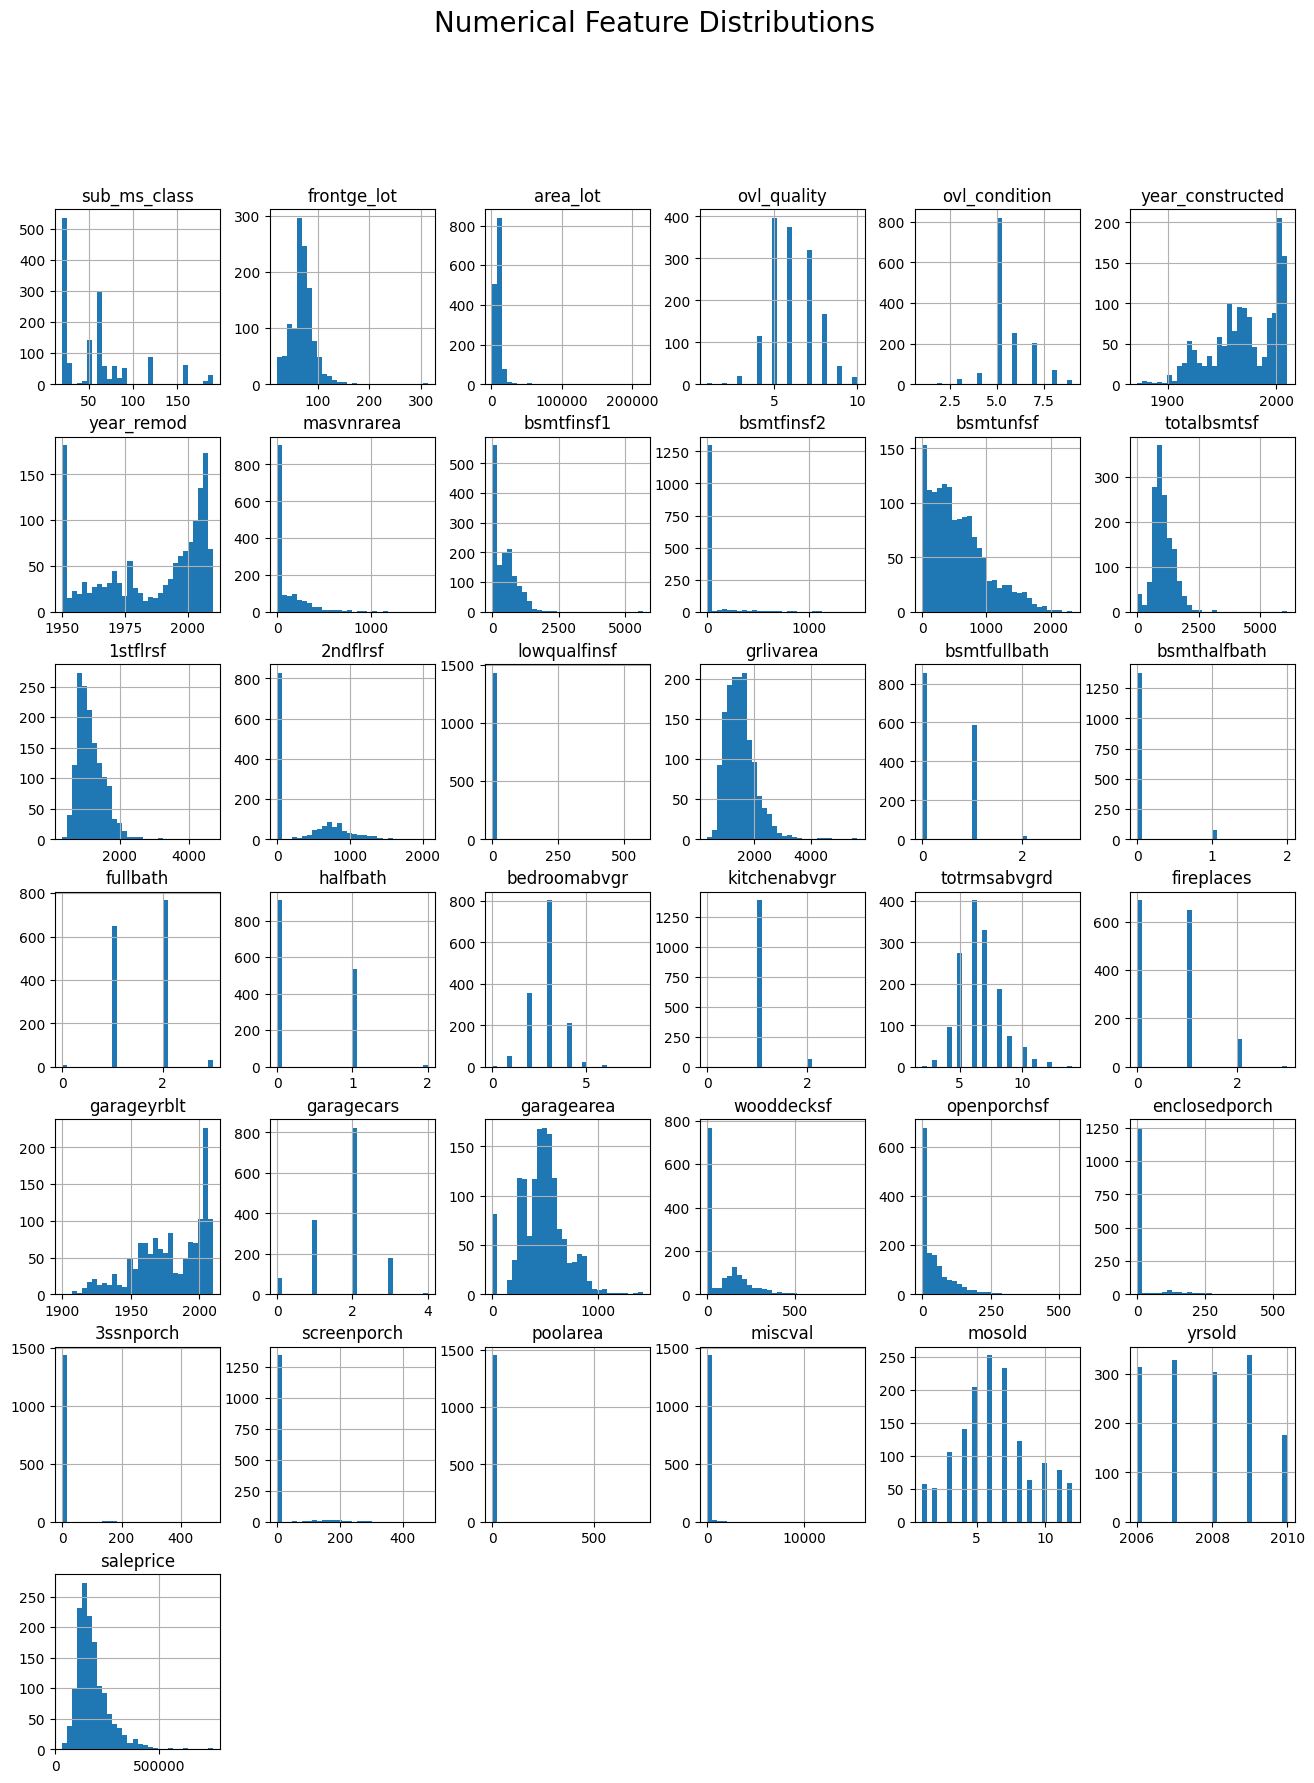

In [11]:
# Plot Hystograms

df[numerical_cols].hist(figsize=(16,20), bins=30)
plt.suptitle("Numerical Feature Distributions", fontsize=20)
plt.show()

From the histograms, we can see that: 3SsnPorch, PoolArea, ScreenPorch, and MiscVal almost always take the same value. We can delete them. 

We can verify this statistically : 

3ssnporch

In [12]:
(df['3ssnporch'].value_counts(normalize=True) * 100).round(2)

3ssnporch
0      98.36
168     0.21
180     0.14
216     0.14
144     0.14
238     0.07
153     0.07
290     0.07
140     0.07
320     0.07
23      0.07
182     0.07
245     0.07
130     0.07
407     0.07
508     0.07
196     0.07
304     0.07
162     0.07
96      0.07
Name: proportion, dtype: float64

poolarea

In [13]:
(df['poolarea'].value_counts(normalize=True) * 100).round(2)

poolarea
0      99.52
555     0.07
480     0.07
648     0.07
512     0.07
576     0.07
519     0.07
738     0.07
Name: proportion, dtype: float64

screenporch

In [14]:
(df['screenporch'].value_counts(normalize=True) * 100).round(2)

screenporch
0      92.05
192     0.41
224     0.34
120     0.34
180     0.27
       ...  
175     0.07
271     0.07
165     0.07
154     0.07
410     0.07
Name: proportion, Length: 76, dtype: float64

miscval

In [15]:
(df['miscval'].value_counts(normalize=True) * 100).round(2)

miscval
0        96.44
400       0.75
500       0.55
700       0.34
450       0.27
600       0.27
2000      0.27
480       0.14
1200      0.14
15500     0.07
2500      0.07
1150      0.07
1400      0.07
1300      0.07
8300      0.07
350       0.07
620       0.07
3500      0.07
800       0.07
54        0.07
560       0.07
Name: proportion, dtype: float64

In [16]:
df = df.drop(columns=['3ssnporch' , 'poolarea' , 'screenporch' , 'miscval'])
df

,sub_ms_class,zoning_ms,frontge_lot,area_lot,streetname,alleyname,shape_lot,contour_land,util,configlot,...,openporchsf,enclosedporch,poolqc,fence,miscfeature,mosold,yrsold,saletype,salecondition,saleprice
id,,,,,,,,,,,,,,,,,,,,,
128,45,RM,55.0,4388,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,0,NaN,NaN,NaN,6,2007,WD,Normal,87000
456,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,9,2007,WD,Normal,175500
1324,30,RL,50.0,5330,Pave,NaN,Reg,HLS,AllPub,Inside,...,0,0,NaN,NaN,NaN,12,2009,WD,Normal,82500
218,70,RM,57.0,9906,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,172,60,NaN,NaN,NaN,9,2006,WD,Family,107000
1182,120,RM,64.0,5587,Pave,NaN,IR1,HLS,AllPub,Inside,...,53,0,NaN,NaN,NaN,11,2008,New,Partial,392500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,20,RL,85.0,10655,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,10,2009,WD,Normal,284000
1294,60,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,...,28,0,NaN,GdWo,NaN,3,2006,WD,Normal,162900
1362,20,RL,124.0,16158,Pave,NaN,IR1,Low,AllPub,Inside,...,36,0,NaN,NaN,NaN,6,2009,WD,Normal,260000


In [17]:
numerical_cols = list(df.select_dtypes(include = 'number').columns)
numerical_cols

['sub_ms_class',
 'frontge_lot',
 'area_lot',
 'ovl_quality',
 'ovl_condition',
 'year_constructed',
 'year_remod',
 'masvnrarea',
 'bsmtfinsf1',
 'bsmtfinsf2',
 'bsmtunfsf',
 'totalbsmtsf',
 '1stflrsf',
 '2ndflrsf',
 'lowqualfinsf',
 'grlivarea',
 'bsmtfullbath',
 'bsmthalfbath',
 'fullbath',
 'halfbath',
 'bedroomabvgr',
 'kitchenabvgr',
 'totrmsabvgrd',
 'fireplaces',
 'garageyrblt',
 'garagecars',
 'garagearea',
 'wooddecksf',
 'openporchsf',
 'enclosedporch',
 'mosold',
 'yrsold',
 'saleprice']

### Explore categorical columns

In [18]:
# Identify the categorical columns
categorical_cols = list(df.select_dtypes(include='object').columns)

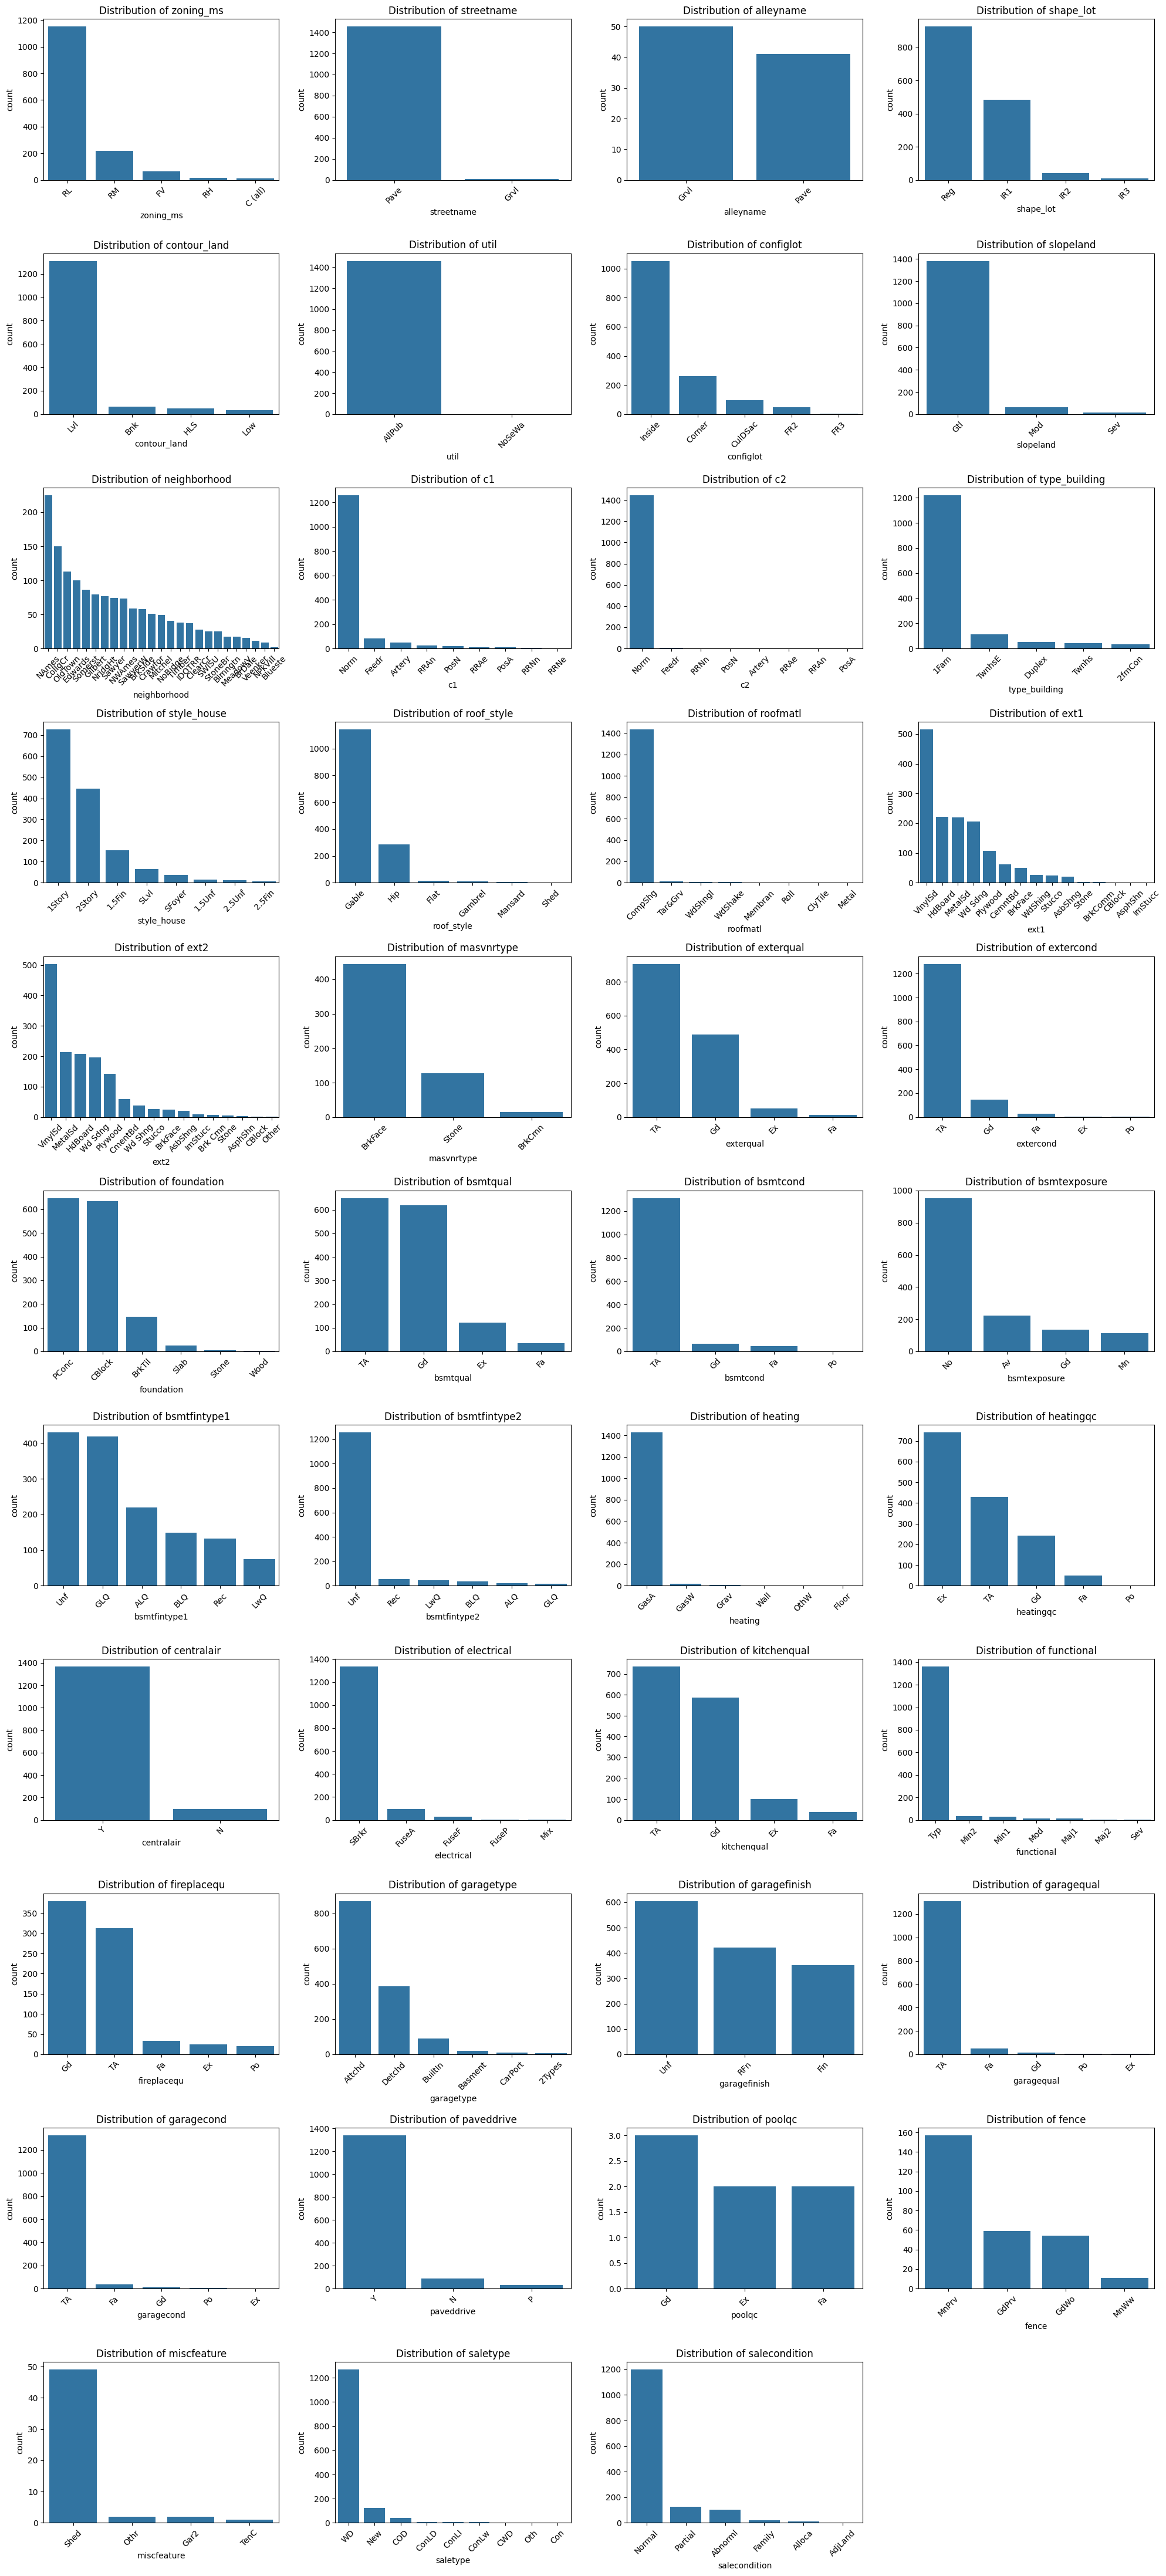

In [19]:
n = len(categorical_cols)

cols = 4  
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axes = axes.flatten() 

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We can do the same treatment for categorical features : 
- streetname, util, c2, roofmatl, heating

streetname

In [20]:
(df['streetname'].value_counts(normalize=True) * 100).round(2)

streetname
Pave    99.59
Grvl     0.41
Name: proportion, dtype: float64

util

In [21]:
(df['util'].value_counts(normalize=True) * 100).round(2)

util
AllPub    99.93
NoSeWa     0.07
Name: proportion, dtype: float64

C2

In [22]:
(df['c2'].value_counts(normalize=True) * 100).round(2)

c2
Norm      98.97
Feedr      0.41
RRNn       0.14
PosN       0.14
Artery     0.14
RRAe       0.07
RRAn       0.07
PosA       0.07
Name: proportion, dtype: float64

roofmatl

In [23]:
(df['roofmatl'].value_counts(normalize=True) * 100).round(2)

roofmatl
CompShg    98.22
Tar&Grv     0.75
WdShngl     0.41
WdShake     0.34
Membran     0.07
Roll        0.07
ClyTile     0.07
Metal       0.07
Name: proportion, dtype: float64

heating

In [24]:
(df['heating'].value_counts(normalize=True) * 100).round(2)

heating
GasA     97.81
GasW      1.23
Grav      0.48
Wall      0.27
OthW      0.14
Floor     0.07
Name: proportion, dtype: float64

In [25]:
df = df.drop(columns=['streetname' , 'util' , 'c2' , 'roofmatl' , 'heating'])
df

,sub_ms_class,zoning_ms,frontge_lot,area_lot,alleyname,shape_lot,contour_land,configlot,slopeland,neighborhood,...,openporchsf,enclosedporch,poolqc,fence,miscfeature,mosold,yrsold,saletype,salecondition,saleprice
id,,,,,,,,,,,,,,,,,,,,,
128,45,RM,55.0,4388,NaN,IR1,Bnk,Inside,Gtl,OldTown,...,0,0,NaN,NaN,NaN,6,2007,WD,Normal,87000
456,20,RL,80.0,9600,NaN,Reg,Lvl,Inside,Gtl,NWAmes,...,0,0,NaN,NaN,NaN,9,2007,WD,Normal,175500
1324,30,RL,50.0,5330,NaN,Reg,HLS,Inside,Gtl,BrkSide,...,0,0,NaN,NaN,NaN,12,2009,WD,Normal,82500
218,70,RM,57.0,9906,Grvl,Reg,Lvl,Inside,Gtl,OldTown,...,172,60,NaN,NaN,NaN,9,2006,WD,Family,107000
1182,120,RM,64.0,5587,NaN,IR1,HLS,Inside,Mod,Crawfor,...,53,0,NaN,NaN,NaN,11,2008,New,Partial,392500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,20,RL,85.0,10655,NaN,IR1,Lvl,Inside,Gtl,NridgHt,...,0,0,NaN,NaN,NaN,10,2009,WD,Normal,284000
1294,60,RL,78.0,10140,NaN,Reg,Lvl,Inside,Gtl,NWAmes,...,28,0,NaN,GdWo,NaN,3,2006,WD,Normal,162900
1362,20,RL,124.0,16158,NaN,IR1,Low,Inside,Mod,StoneBr,...,36,0,NaN,NaN,NaN,6,2009,WD,Normal,260000


In [26]:
categorical_cols = list(df.select_dtypes(include='object').columns)

## Data Preparation 

### Duplicate detection

In [27]:
df.duplicated().sum()

np.int64(0)

### Missing Values Imputations

In [28]:
# Finding missing values and showing them
df.isnull().sum().sort_values(ascending=False)[df.isnull().sum() > 0]

poolqc          1453
miscfeature     1406
alleyname       1369
fence           1179
masvnrtype       872
fireplacequ      690
frontge_lot      259
garagetype        81
garagequal        81
garageyrblt       81
garagecond        81
garagefinish      81
bsmtexposure      38
bsmtfintype2      38
bsmtqual          37
bsmtcond          37
bsmtfintype1      37
masvnrarea         8
electrical         1
dtype: int64

#### Missing Values Understanding

- poolqc : pool quality, (no pool, excellent, good, fair)
- miscfeature : additionnal features, (no additionnal features, outbuilding, other, a second garage, tennis court)
- alleyname : type of alley, (no alley, gravel alley, paved alley)
- fence : type of the fence, (no fence, minimum privacy fence, good privacy fence, good wood fence, minimum wood fence)
- masvnrtype : masonry veneer applied to the exterior of the house, (no masonry veneer, face brick, stone veneer, common brick)
- fireplacequ : quality of the fireplace, (no fireplace, average quality , good quality, excellent quality, poor quality, fair quality) 
- frontge_lot : frontage or width of the lot, (numerical, nan values here should be imputed)
- garagequal : garage quality, (no garage, typical or average, poor, good, fair, excellent)
- garagefinish : interior finish of the garage, (no garage, unfinished, finished, rough finished)
- garagetype : location or configuration of the garage, (no garage, attached to the house, separate form the house, build into the house, 2 garage types, in the basement, covered area for parking)
- garageyrblt : garage year built, (no garage, year of built)
- garagecond : garage condition, (no garage, typical or average, good, poor, fair, excellent)
- bsmtfintype2 : type of finishing in the second finished area of the basement if applicable, (no basement, unfinished, recreation room, below average living quarters, low quality, average living quarters, good living quarters)
- bsmtexposure : exposure level of the basement to the outside, (no basement, no exposure, good, minimum, average)
- bsmtcond : basement condition, (no basement, typical, fair, good, poor)
- bsmtqual : basement quality, (no basement, excellent, good, fair)
- bsmtfintype1 : type of finishing present in the primary finished area, (no basement, low quality, average living quarters, unfinished, good living quarters, below average quarters, recreation room)
- masvnrarea : masonry venner area it indicates total area of the house having masonry veneer, (no masonry veneer one the house, numerical value)
- electrical : type of electrical system, (standard breaker, fuse box amps, fuse box premimum, fuse box fuses, mixed)

For all those features (except frontge_lot), Null values can be replaced by O

In [29]:
# Replacing Nan values by 0 in the variables (except for Frontge_lot)

cols_to_fill_zero = ['poolqc','miscfeature','alleyname','fence','masvnrtype','fireplacequ','garagequal','garagefinish','garagetype','garageyrblt','garagecond','bsmtfintype2','bsmtexposure','bsmtcond','bsmtqual','bsmtfintype1','masvnrarea','electrical']

# Replace Nan by 0
df[cols_to_fill_zero] = df[cols_to_fill_zero].fillna(0)

<Axes: >

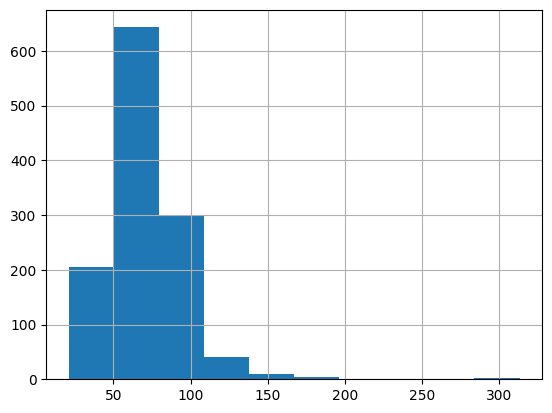

In [30]:
# Show frontge_lot histogram to understand the distribution
df['frontge_lot'].hist()

In [31]:
# the distribution is asymetrical, so we can replace the nan values by the median 

median_frontge_lot = df['frontge_lot'].median()

# Imputation
df['frontge_lot'].fillna(median_frontge_lot, inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_6152\2756282654.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['frontge_lot'].fillna(median_frontge_lot, inplace = True)


In [32]:
# Verification
df.isnull().sum()

sub_ms_class     0
zoning_ms        0
frontge_lot      0
area_lot         0
alleyname        0
                ..
mosold           0
yrsold           0
saletype         0
salecondition    0
saleprice        0
Length: 71, dtype: int64

### Outlier Detection and Handling

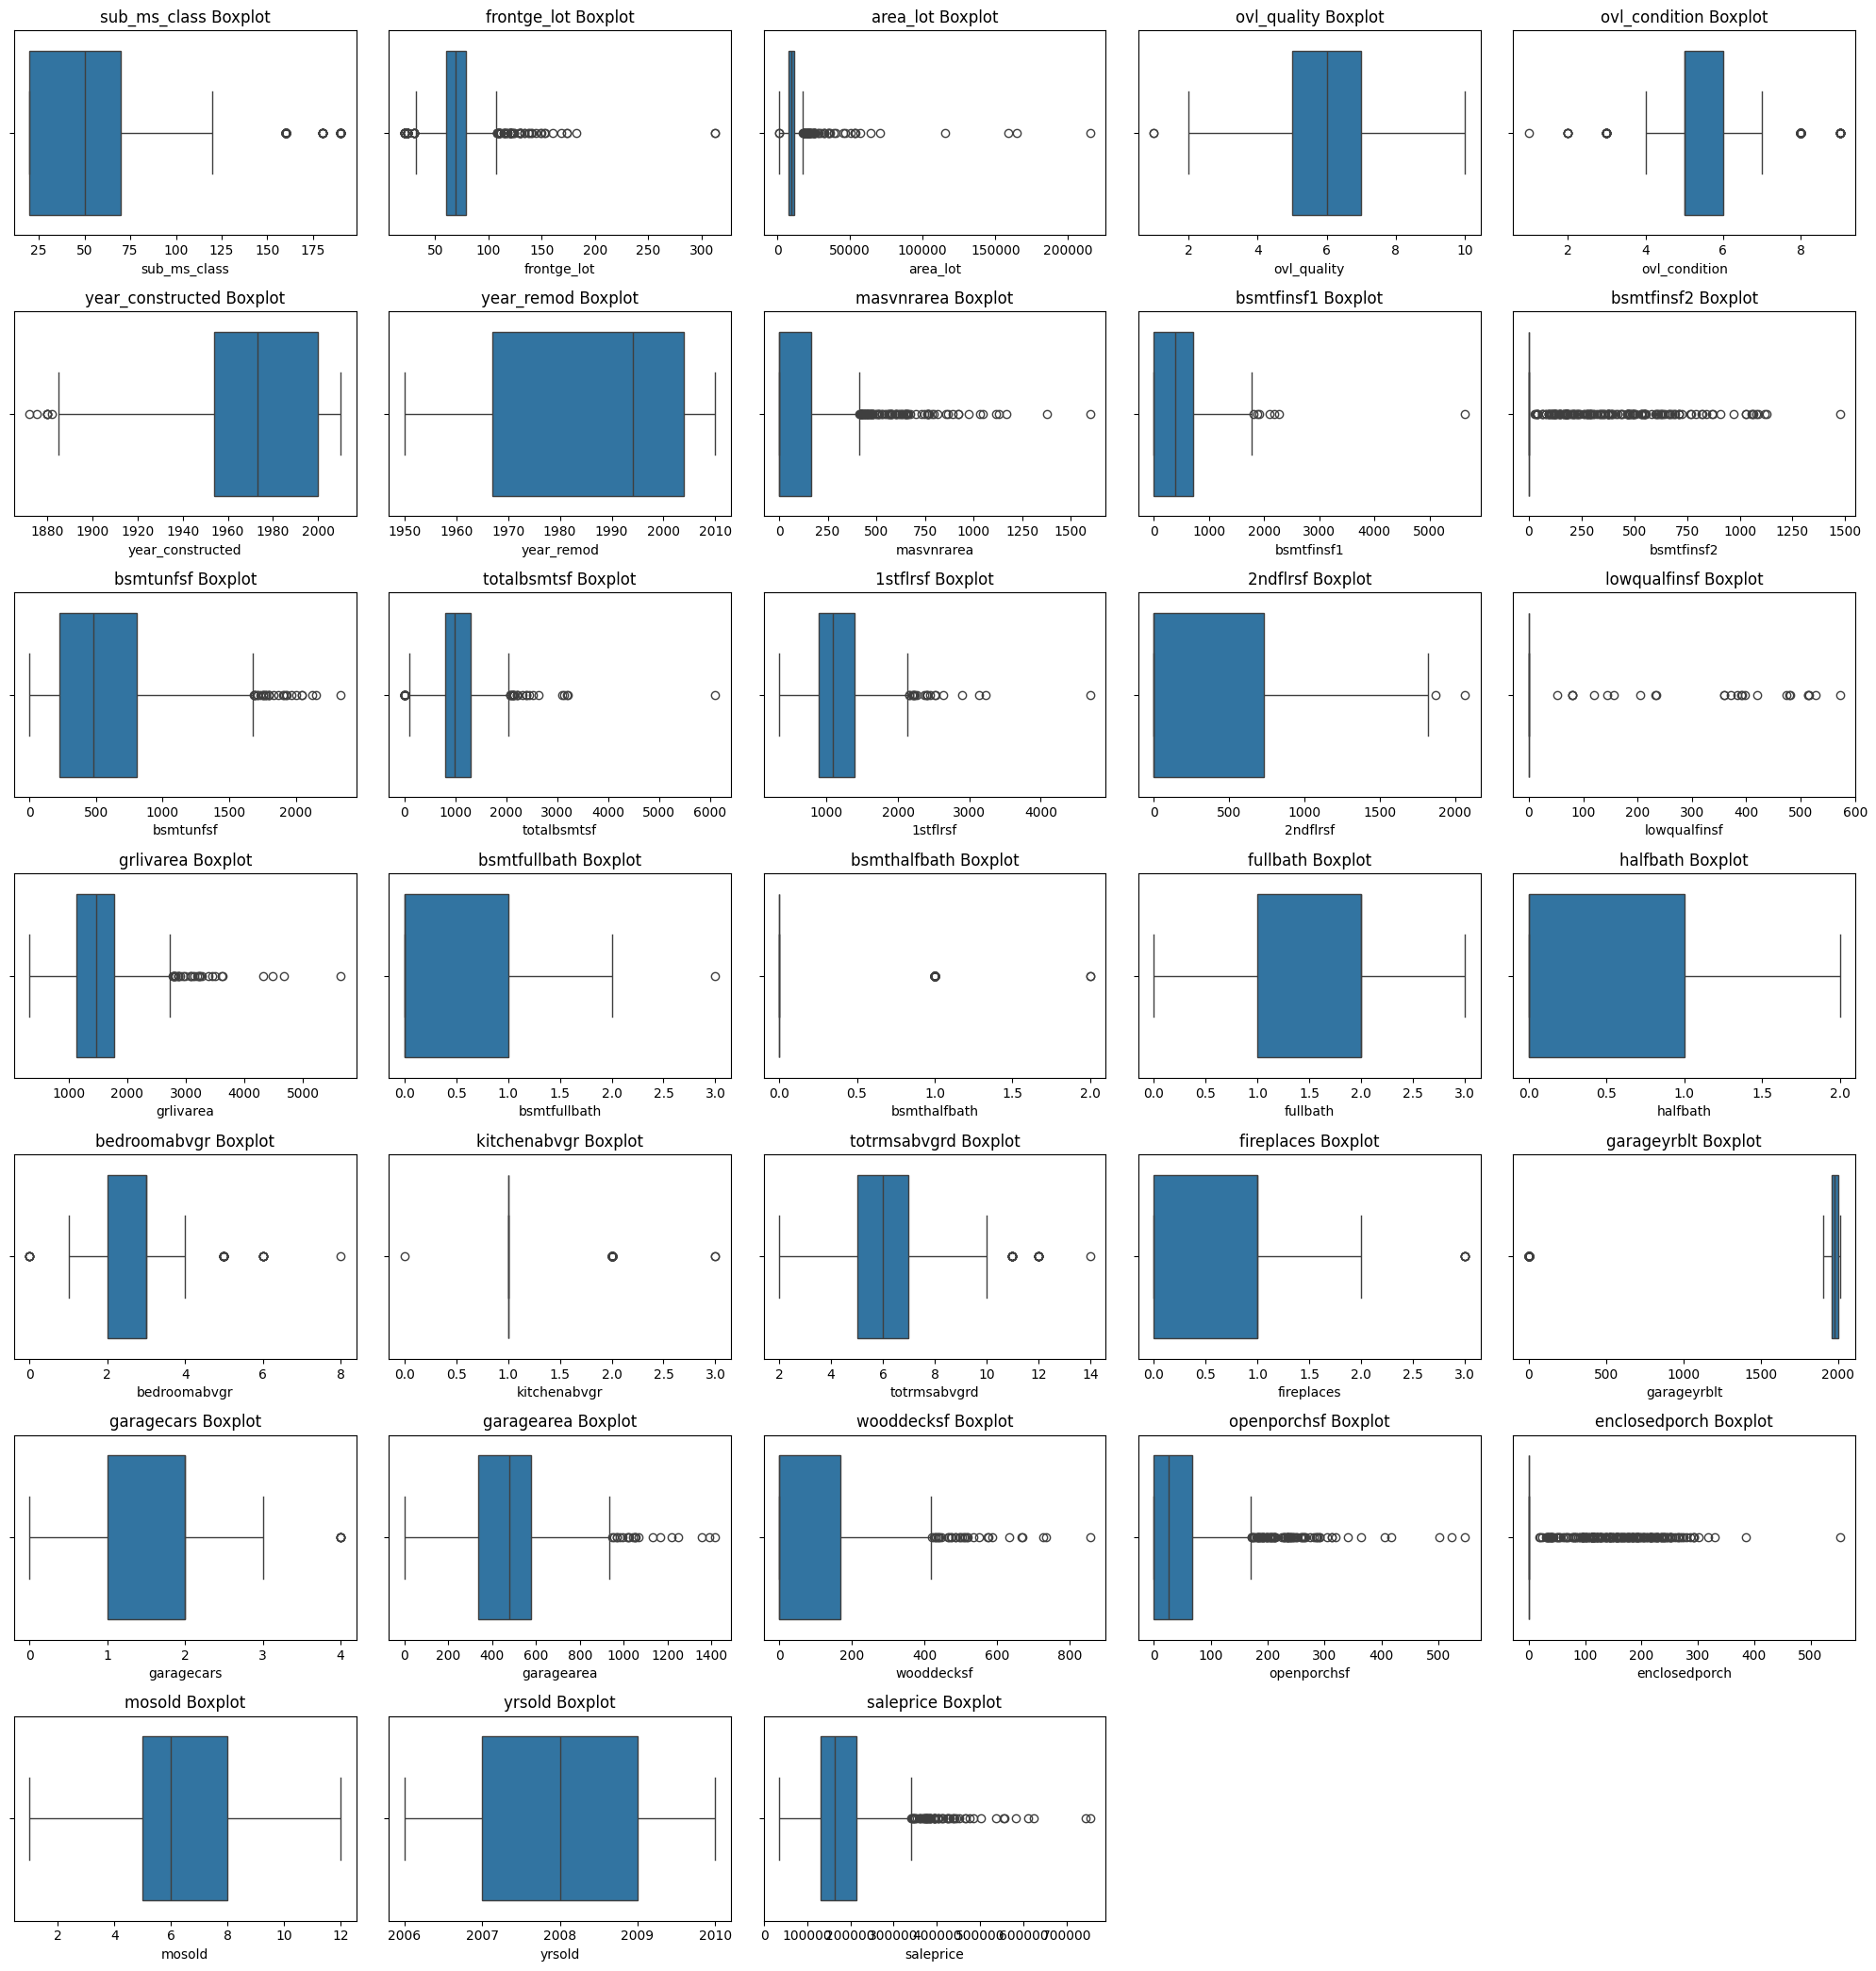

In [33]:
# Outliers detection

n_cols = 5  
n_rows = math.ceil(len(numerical_cols) / n_cols)  

plt.figure(figsize=(n_cols*4, n_rows*3))

for i, col in enumerate(numerical_cols, 1): 
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col])
    plt.title(f'{col} Boxplot')

plt.tight_layout()
plt.show()

In [34]:
cols_with_outliers = ['frontge_lot', 'area_lot' , 'year_constructed' , 'masvnrarea' , 
                      'bsmtfinsf1' , 'bsmtfinsf2' , 'bsmtunfsf' , 'totalbsmtsf' , 
                      '1stflrsf' , '2ndflrsf' , 'lowqualfinsf' , 'grlivarea' , 'kitchenabvgr' ,
                      'bsmtfullbath' , 'bsmthalfbath' , 'bedroomabvgr' ,
                      'totrmsabvgrd' , 'fireplaces' , 'garageyrblt' , 'garagecars' , 'garagearea' , 
                      'wooddecksf' , 'openporchsf' , 'enclosedporch' , 'saleprice']

In [35]:
# Select outliers using the IQR method 

def cap_outliers(df, columns) : 
    for col in columns : 
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR   # minimum threshold for non-outlier values
        upper_bound = Q3 + 1.5 * IQR   # maximum threshold for non-outlier values
        
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    return df

df_capped = cap_outliers(df.copy(), cols_with_outliers)

df_capped 

,sub_ms_class,zoning_ms,frontge_lot,area_lot,alleyname,shape_lot,contour_land,configlot,slopeland,neighborhood,...,openporchsf,enclosedporch,poolqc,fence,miscfeature,mosold,yrsold,saletype,salecondition,saleprice
id,,,,,,,,,,,,,,,,,,,,,
128,45,RM,55.0,4388.0,0,IR1,Bnk,Inside,Gtl,OldTown,...,0,0,0,0,0,6,2007,WD,Normal,87000.0
456,20,RL,80.0,9600.0,0,Reg,Lvl,Inside,Gtl,NWAmes,...,0,0,0,0,0,9,2007,WD,Normal,175500.0
1324,30,RL,50.0,5330.0,0,Reg,HLS,Inside,Gtl,BrkSide,...,0,0,0,0,0,12,2009,WD,Normal,82500.0
218,70,RM,57.0,9906.0,Grvl,Reg,Lvl,Inside,Gtl,OldTown,...,170,0,0,0,0,9,2006,WD,Family,107000.0
1182,120,RM,64.0,5587.0,0,IR1,HLS,Inside,Mod,Crawfor,...,53,0,0,0,0,11,2008,New,Partial,340037.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,20,RL,85.0,10655.0,0,IR1,Lvl,Inside,Gtl,NridgHt,...,0,0,0,0,0,10,2009,WD,Normal,284000.0
1294,60,RL,78.0,10140.0,0,Reg,Lvl,Inside,Gtl,NWAmes,...,28,0,0,GdWo,0,3,2006,WD,Normal,162900.0
1362,20,RL,107.5,16158.0,0,IR1,Low,Inside,Mod,StoneBr,...,36,0,0,0,0,6,2009,WD,Normal,260000.0


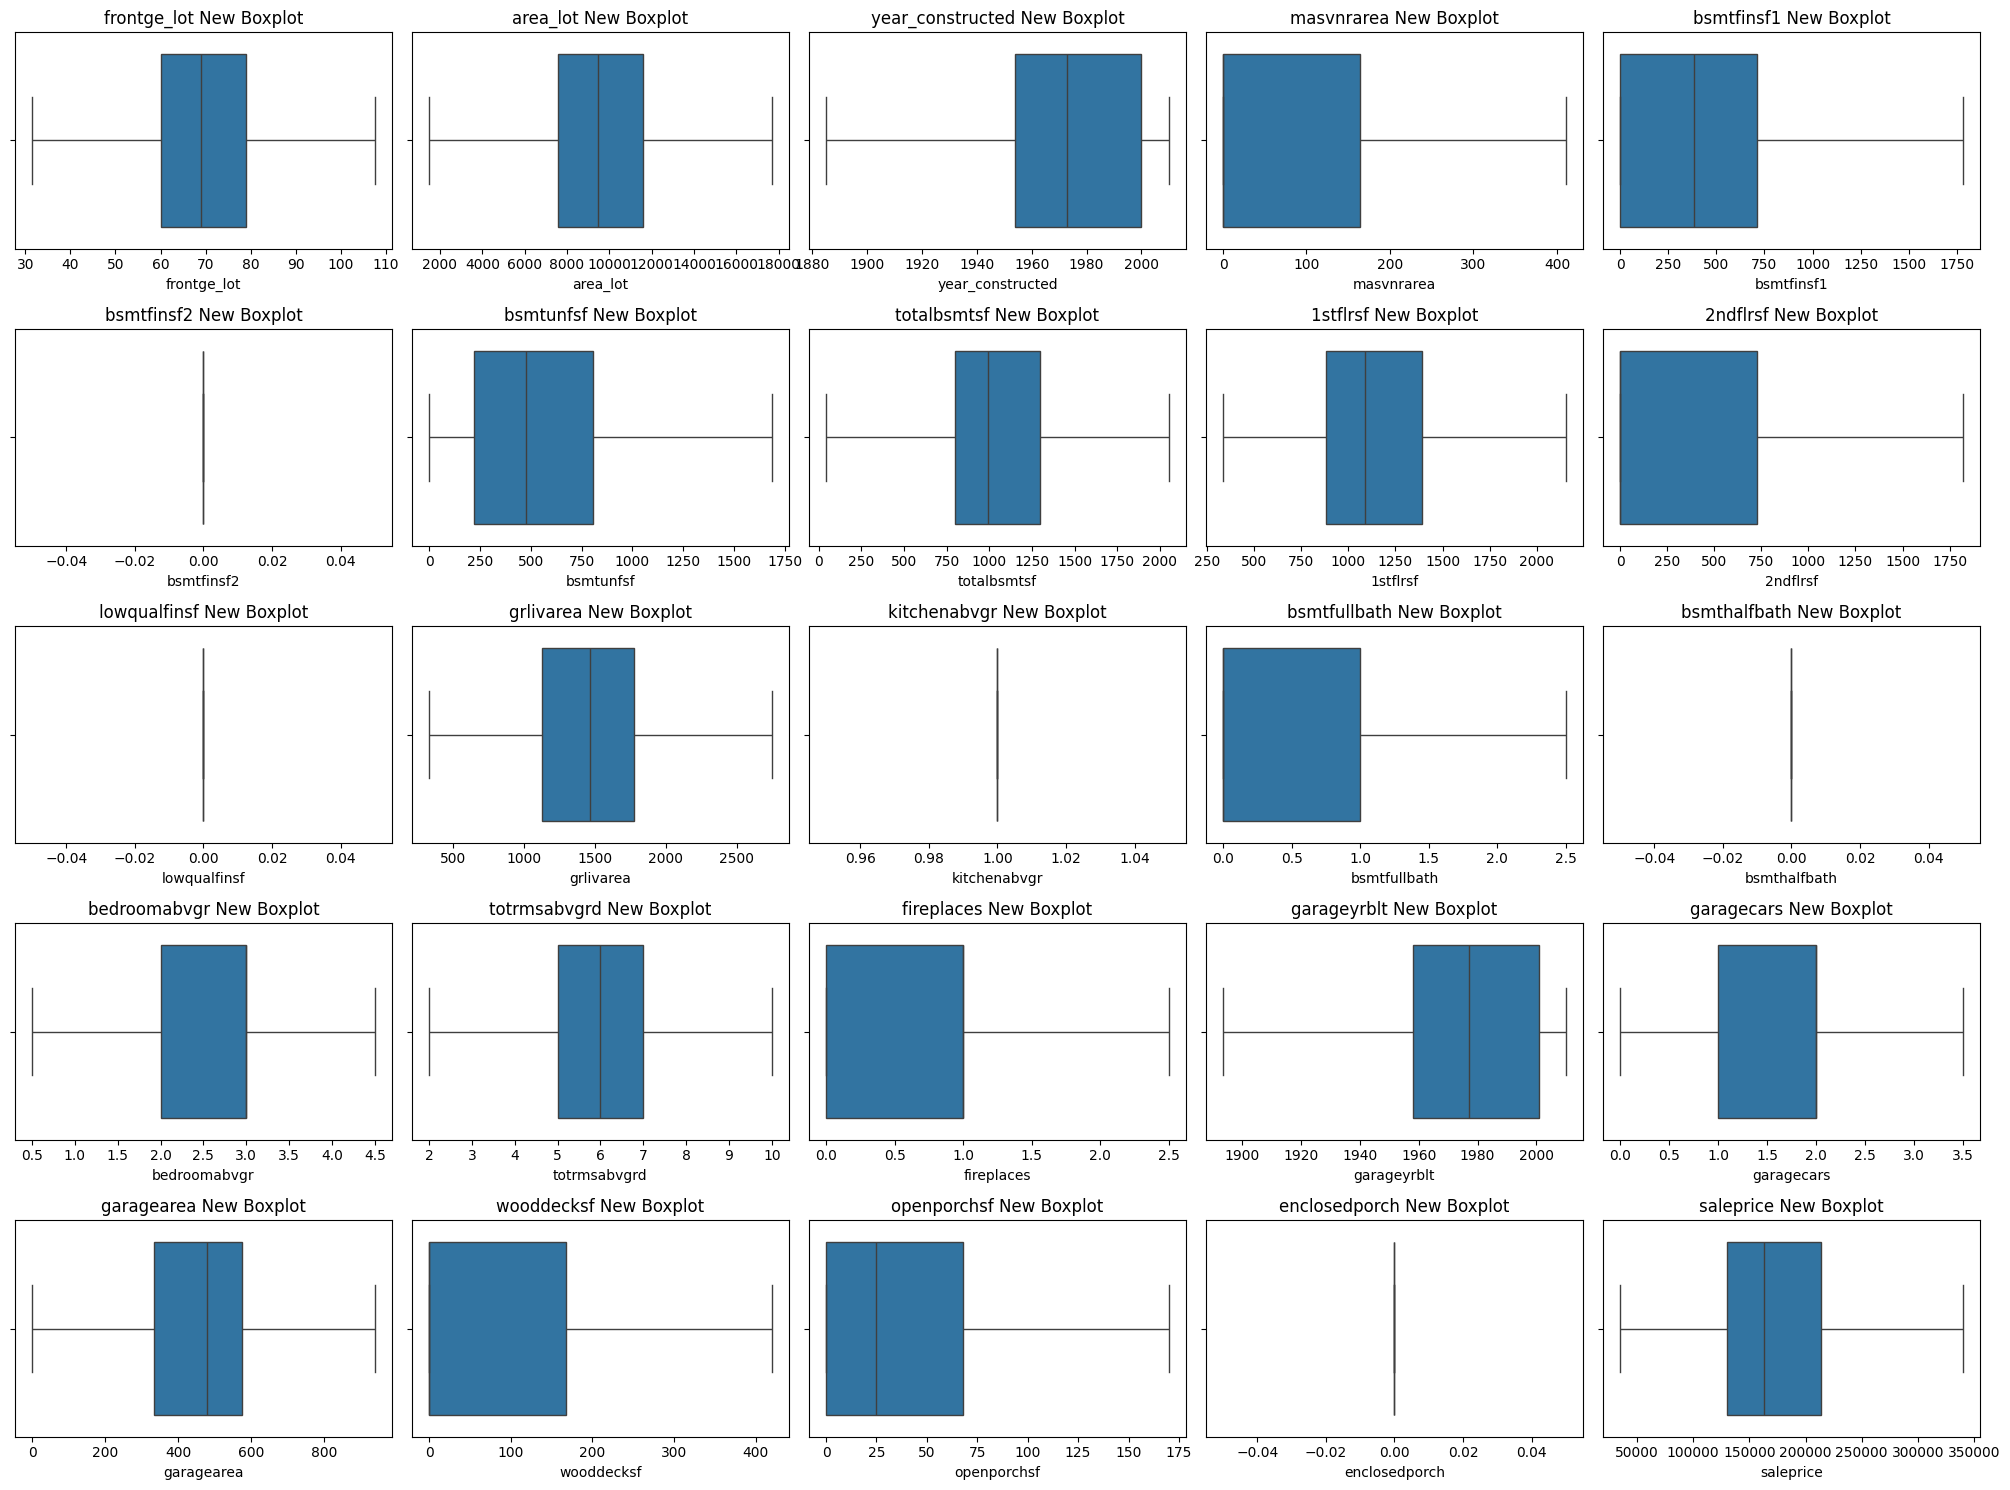

In [36]:
# Show the new boxplots

n_cols = 5
n_rows = math.ceil(len(cols_with_outliers) / n_cols)

plt.figure(figsize=(n_cols*4, n_rows*3))

for i, col in enumerate(cols_with_outliers, 1): 
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df_capped[col])
    plt.title(f'{col} New Boxplot')

plt.tight_layout()
plt.show()

Capping outliers using percentiles is useful for reducing the influence of extreme values. However, this approach has several limitations:

Loss of information, especially when outliers carry meaningful insights (e.g., BsmtFinSF2).

We could have used log transformation instead of capping to reduce the impact of extreme values while preserving the full information. A robust model could then be chosen to handle the distribution. However, the requirement here was to cap outliers, if any.

### Correlation Analysis and Feature Engineering

For this part, there are 3 steps : 
- Deleting the variables that give the same information
- Analysing the correlation between numerical variables, to reduce the number of columns
- Performing an encoding for categorical varaibles, then retrying correlation analysis

We can see that : 
- bsmtfinsf1, bsmtfinsf2, bsmtunfsf are included in totalbsmtsf. So we can keep totalbsmtsf
- 1stflrsf, 2ndflrsf are included in grlivarea. So we can keep grlivarea
- garagecars and garagearea are related (the more the garage is big the more it contains cars; we will prove it in the correlation analysis). We can keep garagearea
- halfbath (toilettes + sink) and fullbath (toilettes + sink + shower) can be combined in totalbath with the relation : totalbath = fullbath + 0.5 * halfbath
- same for bsmthalfbath and bsmtfullbath
- totalbath and bsmttotalbath can be combined in a variable named totalbathinhouse

In [37]:
# Create totalbath and bsmttotalbath
df_capped['totalbath'] = df_capped['fullbath'] + 0.5 * df_capped['halfbath']
df_capped['totalbsmtbath'] = df_capped['bsmtfullbath'] + 0.5 * df_capped['bsmthalfbath']

columns_to_drop = ['bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf',
    '1stflrsf', '2ndflrsf',
    'garagecars', 'lowqualfinsf',       
    'halfbath', 'fullbath',  # replaced by totalbath
    'bsmtfullbath', 'bsmthalfbath']  # replaced by bsmttotalbath

df_capped = df_capped.drop(columns=columns_to_drop, errors='ignore')

In [38]:
# Total bath in house variable creation
df_capped['totalbathinhouse'] = df_capped['totalbath'] + df_capped['totalbsmtbath']

df_capped = df_capped.drop(columns=['totalbath', 'totalbsmtbath'])

With this technique, we deleted 10 columns

#### Correlation Analysis

In [39]:
# We have to choose the numerical variables among remaining features

numerical_cols_capped = ['frontge_lot', 'area_lot', 'year_constructed', 'year_remod', 
                  'masvnrarea', 'totalbsmtsf', 'grlivarea', 
                  'bedroomabvgr', 
                  'totrmsabvgrd', 'fireplaces', 'garageyrblt', 'garagearea',
                  'wooddecksf', 'openporchsf', 'enclosedporch',  
                  'mosold', 'yrsold', 
                  'saleprice' , 'totalbathinhouse']

numeric_df_capped = df_capped[numerical_cols_capped]

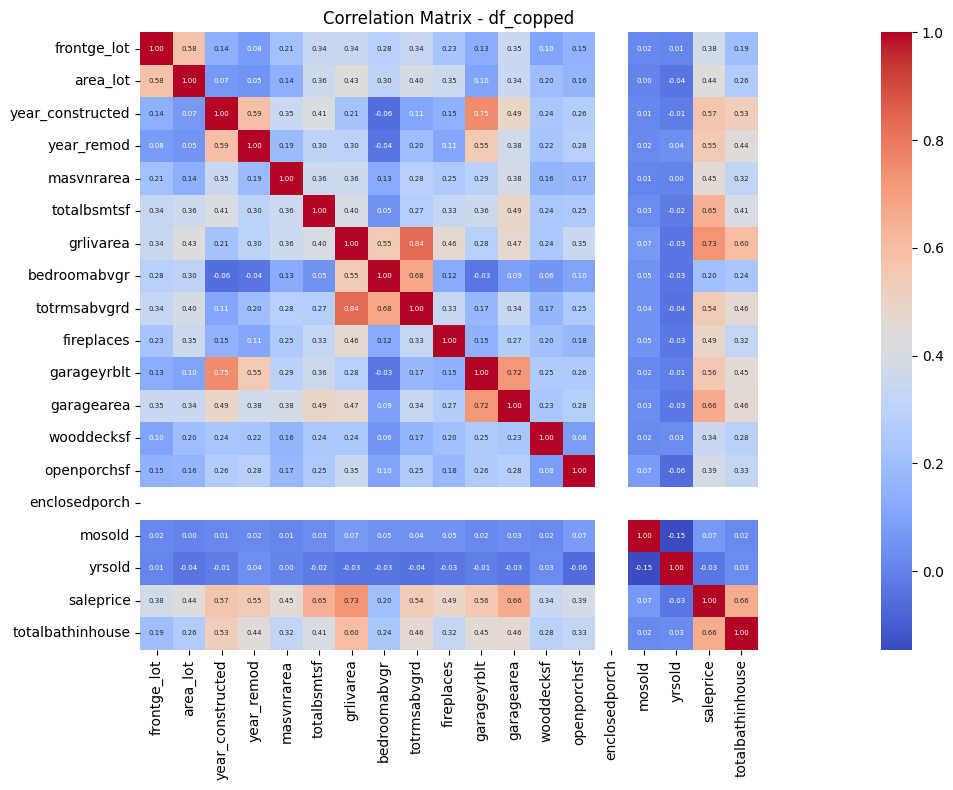

In [40]:
corr_matrix = numeric_df_capped.corr(method='pearson')

plt.figure(figsize=(25,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True, annot_kws={"size": 5})
plt.title("Correlation Matrix - df_copped")
plt.tight_layout()
plt.show()

We can see that : 
- grlivarea and totalrmsabvgrd are highly correlated (0.84), so we are keeping totalrmsabvgrd

In [41]:
df_capped = df_capped.drop(columns=['totrmsabvgrd'])
df_capped

,sub_ms_class,zoning_ms,frontge_lot,area_lot,alleyname,shape_lot,contour_land,configlot,slopeland,neighborhood,...,enclosedporch,poolqc,fence,miscfeature,mosold,yrsold,saletype,salecondition,saleprice,totalbathinhouse
id,,,,,,,,,,,,,,,,,,,,,
128,45,RM,55.0,4388.0,0,IR1,Bnk,Inside,Gtl,OldTown,...,0,0,0,0,6,2007,WD,Normal,87000.0,1.0
456,20,RL,80.0,9600.0,0,Reg,Lvl,Inside,Gtl,NWAmes,...,0,0,0,0,9,2007,WD,Normal,175500.0,1.5
1324,30,RL,50.0,5330.0,0,Reg,HLS,Inside,Gtl,BrkSide,...,0,0,0,0,12,2009,WD,Normal,82500.0,1.0
218,70,RM,57.0,9906.0,Grvl,Reg,Lvl,Inside,Gtl,OldTown,...,0,0,0,0,9,2006,WD,Family,107000.0,1.0
1182,120,RM,64.0,5587.0,0,IR1,HLS,Inside,Mod,Crawfor,...,0,0,0,0,11,2008,New,Partial,340037.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,20,RL,85.0,10655.0,0,IR1,Lvl,Inside,Gtl,NridgHt,...,0,0,0,0,10,2009,WD,Normal,284000.0,3.0
1294,60,RL,78.0,10140.0,0,Reg,Lvl,Inside,Gtl,NWAmes,...,0,0,GdWo,0,3,2006,WD,Normal,162900.0,2.5
1362,20,RL,107.5,16158.0,0,IR1,Low,Inside,Mod,StoneBr,...,0,0,0,0,6,2009,WD,Normal,260000.0,3.0


### Encoding non-numerical features 

We should encode the non-numerical features.

- zoning_ms, alleyname, shape_lot, contour_land, configlot, 
slopeland, neighborhood, c1, type_builidng, style_house, roof_style, 
roofmatl, ext1, ext2, masvnrtype, exertqual, extercond, foundation,
bsmtqual, bsmtcond, bsmtexposure, bsmtfintype1, bsmtfintype2,
heatingqc, centralair, electrical, kitchenqual, functional, fireplacequ,
garagetype, garagefinish, garagequal, garagecond, pavedrive, fence, liscfeature, saletype, salecondition


In [42]:
df['saletype'].unique()

array(['WD', 'New', 'COD', 'Oth', 'ConLD', 'Con', 'ConLI', 'CWD', 'ConLw'],
      dtype=object)

In [43]:
# We will be working with df_capped, to encode non-numerical features

cols_to_encode = df_capped.select_dtypes(include=['object']).columns.tolist()

cols_to_encode

['zoning_ms',
 'alleyname',
 'shape_lot',
 'contour_land',
 'configlot',
 'slopeland',
 'neighborhood',
 'c1',
 'type_building',
 'style_house',
 'roof_style',
 'ext1',
 'ext2',
 'masvnrtype',
 'exterqual',
 'extercond',
 'foundation',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtfintype2',
 'heatingqc',
 'centralair',
 'electrical',
 'kitchenqual',
 'functional',
 'fireplacequ',
 'garagetype',
 'garagefinish',
 'garagequal',
 'garagecond',
 'paveddrive',
 'poolqc',
 'fence',
 'miscfeature',
 'saletype',
 'salecondition']

Performing Label Encoding for ordinal variables :

In [44]:
quality_mapping = {
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
}

ordinal_columns = ['exterqual', 'extercond', 'bsmtqual', 'bsmtcond', 'kitchenqual', 'fireplacequ', 'garagequal', 'garagecond']

for col in ordinal_columns:
    df_capped[col] = df_capped[col].replace(quality_mapping)

C:\Users\hp\AppData\Local\Temp\ipykernel_6152\1597589371.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_capped[col] = df_capped[col].replace(quality_mapping)


In [45]:
new_numerical_cols_capped = df_capped.select_dtypes(include = ['int64' , 'float64'])
new_numerical_cols_capped = new_numerical_cols_capped.drop(columns=['sub_ms_class'])

new_numerical_cols_capped

,frontge_lot,area_lot,ovl_quality,ovl_condition,year_constructed,year_remod,masvnrarea,exterqual,extercond,bsmtqual,...,garagearea,garagequal,garagecond,wooddecksf,openporchsf,enclosedporch,mosold,yrsold,saleprice,totalbathinhouse
id,,,,,,,,,,,,,,,,,,,,,
128,55.0,4388.0,5,7,1930,1950,0.0,3,4,3,...,0.0,0,0,0,0,0,6,2007,87000.0,1.0
456,80.0,9600.0,7,6,1973,1973,320.0,3,3,3,...,528.0,3,3,0,0,0,9,2007,175500.0,1.5
1324,50.0,5330.0,4,7,1940,1950,0.0,2,3,3,...,0.0,0,0,164,0,0,12,2009,82500.0,1.0
218,57.0,9906.0,4,4,1925,1950,0.0,3,3,3,...,210.0,3,3,0,170,0,9,2006,107000.0,1.0
1182,64.0,5587.0,8,5,2008,2008,186.0,5,3,5,...,482.0,3,3,162,53,0,11,2008,340037.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,85.0,10655.0,8,5,2003,2004,296.0,4,3,4,...,880.0,3,3,0,0,0,10,2009,284000.0,3.0
1294,78.0,10140.0,7,5,1976,1976,0.0,3,3,4,...,528.0,3,3,0,28,0,3,2006,162900.0,2.5
1362,107.5,16158.0,7,5,2005,2005,16.0,4,3,5,...,430.0,3,3,168,36,0,6,2009,260000.0,3.0


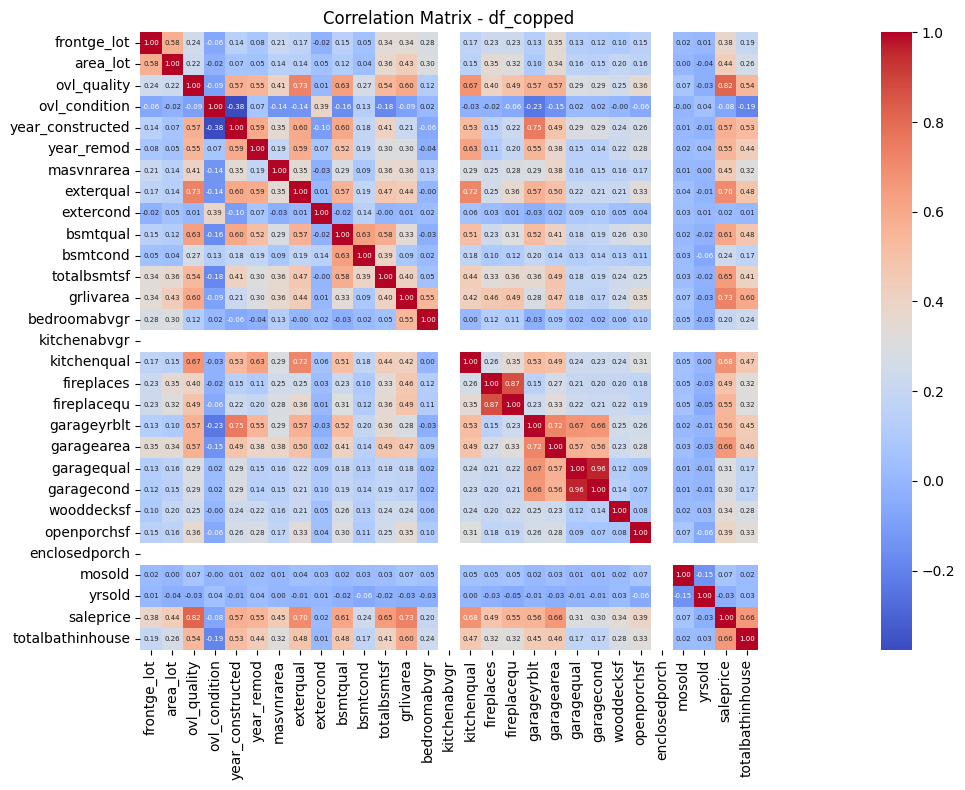

In [46]:
# Retry heatmap considering encoded categorical variables 

corr_matrix = new_numerical_cols_capped.corr(method='pearson')

plt.figure(figsize=(25,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True, annot_kws={"size": 5})
plt.title("Correlation Matrix - df_copped")
plt.tight_layout()
plt.show()

We can that : 
- fireplacequ and fireplaces are highly correlated. So we are keeping fireplaces
- garageyrblt, garagequal and garagecond are highly correlated. So we are keeping garagequal

In [47]:
df_capped = df_capped.drop(columns=['fireplacequ' , 'garageyrblt' , 'garagecond'])
df_capped.columns

Index(['sub_ms_class', 'zoning_ms', 'frontge_lot', 'area_lot', 'alleyname',
       'shape_lot', 'contour_land', 'configlot', 'slopeland', 'neighborhood',
       'c1', 'type_building', 'style_house', 'ovl_quality', 'ovl_condition',
       'year_constructed', 'year_remod', 'roof_style', 'ext1', 'ext2',
       'masvnrtype', 'masvnrarea', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'totalbsmtsf', 'heatingqc', 'centralair', 'electrical', 'grlivarea',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'functional',
       'fireplaces', 'garagetype', 'garagefinish', 'garagearea', 'garagequal',
       'paveddrive', 'wooddecksf', 'openporchsf', 'enclosedporch', 'poolqc',
       'fence', 'miscfeature', 'mosold', 'yrsold', 'saletype', 'salecondition',
       'saleprice', 'totalbathinhouse'],
      dtype='object')

- The numerical features highly correlated with saleprice are : totalbathinhouse, garagearea, kitchenqual, ovlquality, grlivarea
- We will confirm this information using feature importance !

# Different Approach for differents Use cases 

1️⃣ Regression Use Case: Predicting SalePrice

Objective: Predict the sale price of a house using other features.

Approach:

Ordinal features were encoded using Label Encoding, preserving their natural order.

Non-ordinal categorical features will be encoded using Target Encoding, where each category is replaced by the average SalePrice for that group.

This encoding setup is appropriate here because SalePrice is the regression target, and target encoding introduces useful signal into categorical variables.

2️⃣ Classification Use Case: Predicting SaleType

Objective: Classify the type of sale ('WD', 'New', 'COD', etc.) using the other features.

Approach:

We kept the Label Encoding for ordinal variables, since their order carries meaning.

However, we will avoid Target Encoding here, because it would leak information from SalePrice into SaleType, which is unrelated and could lead to data leakage or distorted learning.

Instead, for the remaining categorical variables, we will apply Label Encoding or One-Hot Encoding, choosing models (like Random Forest) that are not sensitive to artificial numerical order in categorical variables.

Conclusion : 
For that matter, we will devide the next part to two parts : 
- Part 1 : Use Case 1
- Part 2 : Use Case 2

## Part 1 : Use Case 1 : 

#### Target Encoding for remaining Categorical Columns

In [48]:
def kfold_target_encode(df, categorical_cols, target_col, k=5, num_folds=5):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    
    # Golbal Mean
    global_mean = df[target_col].mean()
    
    encoding_dict = {col: [] for col in categorical_cols}
    
    # K-Folds validation
    for train_idx, val_idx in kf.split(df):
        train_df = df.iloc[train_idx]
        val_df = df.iloc[val_idx]
        
        for col in categorical_cols:
            mean_encoded = train_df.groupby(col)[target_col].mean()
            n_cat = train_df.groupby(col)[target_col].count()
            
            weighted_encoded = (n_cat * mean_encoded + k * global_mean) / (n_cat + k)
            
            val_encoded = val_df[col].map(weighted_encoded).fillna(global_mean)
            encoding_dict[col].append(val_encoded)
    
    for col in categorical_cols:
        df[col] = np.concatenate(encoding_dict[col], axis=0)
    
    return df

categorical_cols_to_encode = ['sub_ms_class', 'zoning_ms', 'alleyname', 'shape_lot', 'contour_land', 'configlot',
                    'slopeland', 'neighborhood', 'c1', 'type_building', 'style_house',
                    'roof_style', 'ext1', 'ext2', 'masvnrtype', 'foundation',
                    'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heatingqc',
                    'centralair', 'electrical', 'functional', 'garagetype', 'garagefinish',
                    'paveddrive', 'poolqc', 'fence', 'miscfeature', 'saletype',
                    'salecondition']

df_to_encode = df_capped.copy()
df_capped_encoded_kfold = kfold_target_encode(df_to_encode, categorical_cols_to_encode, target_col='saleprice', k=5, num_folds=5)

df_capped_encoded_kfold

,sub_ms_class,zoning_ms,frontge_lot,area_lot,alleyname,shape_lot,contour_land,configlot,slopeland,neighborhood,...,enclosedporch,poolqc,fence,miscfeature,mosold,yrsold,saletype,salecondition,saleprice,totalbathinhouse
id,,,,,,,,,,,,,,,,,,,,,
128,232204.566527,211875.920194,55.0,4388.0,179940.997395,163022.076584,177077.434286,174349.458778,176733.210669,223017.881416,...,0,177324.896945,183860.278446,178523.667373,6,2007,254981.204276,253883.349332,87000.0,1.0
456,232204.566527,186875.827486,80.0,9600.0,179940.997395,163022.076584,177077.434286,177789.441247,176733.210669,195113.590100,...,0,177324.896945,183860.278446,178523.667373,9,2007,171311.577765,173052.075239,175500.0,1.5
1324,232204.566527,186875.827486,50.0,5330.0,179940.997395,200201.840546,177077.434286,174349.458778,176733.210669,192673.195998,...,0,177324.896945,183860.278446,178523.667373,12,2009,171311.577765,173052.075239,82500.0,1.0
218,180100.976382,186875.827486,57.0,9906.0,179940.997395,163022.076584,177077.434286,174349.458778,176733.210669,189364.367640,...,0,177324.896945,183860.278446,178523.667373,9,2006,171311.577765,158598.074175,107000.0,1.0
1182,180100.976382,186875.827486,64.0,5587.0,179940.997395,163022.076584,177077.434286,174349.458778,176733.210669,232840.920329,...,0,177324.896945,183860.278446,178523.667373,11,2008,171311.577765,173052.075239,340037.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,144426.571338,126453.633916,85.0,10655.0,180569.996503,163615.396520,177845.417347,176456.277872,177625.548404,129281.899267,...,0,178372.564864,185417.785328,179676.568138,10,2009,172620.261683,175097.814006,284000.0,3.0
1294,137603.082542,187897.153987,78.0,10140.0,180569.996503,163615.396520,177845.417347,175820.950457,177625.548404,146113.068542,...,0,178372.564864,185417.785328,179676.568138,3,2006,172620.261683,175097.814006,162900.0,2.5
1362,182420.482036,187897.153987,107.5,16158.0,180569.996503,163615.396520,177845.417347,175820.950457,177625.548404,146113.068542,...,0,178372.564864,185417.785328,179676.568138,6,2009,172620.261683,175097.814006,260000.0,3.0


#### Standardization

In [49]:
cols_to_standardize = df_capped_encoded_kfold.drop(columns=['saleprice']).columns

scaler = StandardScaler()

df_scaled = df_capped_encoded_kfold.copy()
df_scaled[cols_to_standardize] = scaler.fit_transform(df_capped_encoded_kfold[cols_to_standardize])

df_scaled

,sub_ms_class,zoning_ms,frontge_lot,area_lot,alleyname,shape_lot,contour_land,configlot,slopeland,neighborhood,...,enclosedporch,poolqc,fence,miscfeature,mosold,yrsold,saletype,salecondition,saleprice,totalbathinhouse
id,,,,,,,,,,,,,,,,,,,,,
128,1.584545,1.474430,-0.817973,-1.463736,0.252318,-0.747586,-0.015148,-0.310729,-0.134160,1.007975,...,0.0,0.144267,0.463139,0.231554,-0.119110,-0.614439,3.441295,3.313126,87000.0,-1.493355
456,1.584545,0.393320,0.633321,-0.013189,0.252318,-0.747586,-0.015148,0.067948,-0.134160,0.397744,...,0.0,0.144267,0.463139,0.231554,0.990891,-0.614439,-0.261902,-0.190298,175500.0,-0.861385
1324,1.584545,0.393320,-1.108232,-1.201569,0.252318,1.247504,-0.015148,-0.310729,-0.134160,0.344376,...,0.0,0.144267,0.463139,0.231554,2.100892,0.891994,-0.261902,-0.190298,82500.0,-1.493355
218,0.045837,0.393320,-0.701870,0.071974,0.252318,-0.747586,-0.015148,-0.310729,-0.134160,0.272016,...,0.0,0.144267,0.463139,0.231554,0.990891,-1.367655,-0.261902,-0.816770,107000.0,-1.493355
1182,0.045837,0.393320,-0.295507,-1.130044,0.252318,-0.747586,-0.015148,-0.310729,-0.134160,1.222792,...,0.0,0.144267,0.463139,0.231554,1.730892,0.138777,-0.261902,-0.190298,340037.5,1.034527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,-1.007689,-2.219592,0.923580,0.280428,0.319493,-0.715748,0.060826,-0.078808,0.115530,-1.041910,...,0.0,0.911062,0.579238,0.484739,1.360892,0.891994,-0.203980,-0.101631,284000.0,1.034527
1294,-1.209198,0.437487,0.517217,0.137098,0.319493,-0.715748,0.060826,-0.148746,0.115530,-0.673834,...,0.0,0.911062,0.579238,0.484739,-1.229111,-1.367655,-0.203980,-0.101631,162900.0,0.402557
1362,0.114336,0.437487,2.229744,1.811964,0.319493,-0.715748,0.060826,-0.148746,0.115530,-0.673834,...,0.0,0.911062,0.579238,0.484739,-0.119110,0.891994,-0.203980,-0.101631,260000.0,1.034527


### Exporting the final dataset

In [50]:
df_scaled.to_csv('uc1_dataset.csv', index = False)

## Part 2 : Use Case 2 : 

We will go back to the dataset where the ordinal variables were label encoded : df_capped

In [51]:
df_capped

,sub_ms_class,zoning_ms,frontge_lot,area_lot,alleyname,shape_lot,contour_land,configlot,slopeland,neighborhood,...,enclosedporch,poolqc,fence,miscfeature,mosold,yrsold,saletype,salecondition,saleprice,totalbathinhouse
id,,,,,,,,,,,,,,,,,,,,,
128,45,RM,55.0,4388.0,0,IR1,Bnk,Inside,Gtl,OldTown,...,0,0,0,0,6,2007,WD,Normal,87000.0,1.0
456,20,RL,80.0,9600.0,0,Reg,Lvl,Inside,Gtl,NWAmes,...,0,0,0,0,9,2007,WD,Normal,175500.0,1.5
1324,30,RL,50.0,5330.0,0,Reg,HLS,Inside,Gtl,BrkSide,...,0,0,0,0,12,2009,WD,Normal,82500.0,1.0
218,70,RM,57.0,9906.0,Grvl,Reg,Lvl,Inside,Gtl,OldTown,...,0,0,0,0,9,2006,WD,Family,107000.0,1.0
1182,120,RM,64.0,5587.0,0,IR1,HLS,Inside,Mod,Crawfor,...,0,0,0,0,11,2008,New,Partial,340037.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,20,RL,85.0,10655.0,0,IR1,Lvl,Inside,Gtl,NridgHt,...,0,0,0,0,10,2009,WD,Normal,284000.0,3.0
1294,60,RL,78.0,10140.0,0,Reg,Lvl,Inside,Gtl,NWAmes,...,0,0,GdWo,0,3,2006,WD,Normal,162900.0,2.5
1362,20,RL,107.5,16158.0,0,IR1,Low,Inside,Mod,StoneBr,...,0,0,0,0,6,2009,WD,Normal,260000.0,3.0


In [52]:
cat_cols = df_capped.select_dtypes(include='object').columns

In [53]:
cat_cols

Index(['zoning_ms', 'alleyname', 'shape_lot', 'contour_land', 'configlot',
       'slopeland', 'neighborhood', 'c1', 'type_building', 'style_house',
       'roof_style', 'ext1', 'ext2', 'masvnrtype', 'foundation',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heatingqc',
       'centralair', 'electrical', 'functional', 'garagetype', 'garagefinish',
       'paveddrive', 'poolqc', 'fence', 'miscfeature', 'saletype',
       'salecondition'],
      dtype='object')

In [54]:
# We add sub_ms_class to the categorical columns
if 'sub_ms_class' not in cat_cols:
    cat_cols = cat_cols.insert(0, 'sub_ms_class') 

# We will drop 'saletype' to not encode it with oneHotEncoding
if 'saletype' in cat_cols :
    cat_cols = cat_cols.drop('saletype')

In [55]:
df_capped

,sub_ms_class,zoning_ms,frontge_lot,area_lot,alleyname,shape_lot,contour_land,configlot,slopeland,neighborhood,...,enclosedporch,poolqc,fence,miscfeature,mosold,yrsold,saletype,salecondition,saleprice,totalbathinhouse
id,,,,,,,,,,,,,,,,,,,,,
128,45,RM,55.0,4388.0,0,IR1,Bnk,Inside,Gtl,OldTown,...,0,0,0,0,6,2007,WD,Normal,87000.0,1.0
456,20,RL,80.0,9600.0,0,Reg,Lvl,Inside,Gtl,NWAmes,...,0,0,0,0,9,2007,WD,Normal,175500.0,1.5
1324,30,RL,50.0,5330.0,0,Reg,HLS,Inside,Gtl,BrkSide,...,0,0,0,0,12,2009,WD,Normal,82500.0,1.0
218,70,RM,57.0,9906.0,Grvl,Reg,Lvl,Inside,Gtl,OldTown,...,0,0,0,0,9,2006,WD,Family,107000.0,1.0
1182,120,RM,64.0,5587.0,0,IR1,HLS,Inside,Mod,Crawfor,...,0,0,0,0,11,2008,New,Partial,340037.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,20,RL,85.0,10655.0,0,IR1,Lvl,Inside,Gtl,NridgHt,...,0,0,0,0,10,2009,WD,Normal,284000.0,3.0
1294,60,RL,78.0,10140.0,0,Reg,Lvl,Inside,Gtl,NWAmes,...,0,0,GdWo,0,3,2006,WD,Normal,162900.0,2.5
1362,20,RL,107.5,16158.0,0,IR1,Low,Inside,Mod,StoneBr,...,0,0,0,0,6,2009,WD,Normal,260000.0,3.0


In [56]:
# Cheking the class SaleType

df_capped['saletype'].value_counts()

saletype
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

The target variable saletype exhibits a significant class imbalance, with the "WD" class being dominant and the minority classes being underrepresented. While oversampling could be an option to address this imbalance, it comes with the risk of overfitting, as the model may memorize the duplicated or synthetic samples instead of learning general patterns.

To mitigate this risk, we choose to keep the data as-is and use a model that can assign higher weights to the minority classes. This can be done using Random Forest (RF), which allows the adjustment of class weights through the class_weight='balanced' parameter. This way, the model will pay more attention to the minority classes without the need for oversampling.

Conclusion : 

In summary, instead of oversampling, we:

- Keep the data unchanged to avoid overfitting.

- Use a model like Random Forest with class weighting to address the class imbalance effectively.

This approach balances the classes while minimizing overfitting risk and ensuring better generalization.

In [57]:
# Performing OneHotEncoding for the remaining categorical columns, except for saletype

target = df_capped['saletype']
df_features = df_capped.drop(columns=['saletype'])
df_encoded = pd.get_dummies(df_features, columns=cat_cols, drop_first=True)
df_encoded['saletype'] = target

# show the dataframe
print(f"Nombre de colonnes après OneHotEncoding : {df_encoded.shape[1]}")
df_encoded

Nombre de colonnes après OneHotEncoding : 203


,frontge_lot,area_lot,ovl_quality,ovl_condition,year_constructed,year_remod,masvnrarea,exterqual,extercond,bsmtqual,...,miscfeature_Gar2,miscfeature_Othr,miscfeature_Shed,miscfeature_TenC,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial,saletype
id,,,,,,,,,,,,,,,,,,,,,
128,55.0,4388.0,5,7,1930,1950,0.0,3,4,3,...,False,False,False,False,False,False,False,True,False,WD
456,80.0,9600.0,7,6,1973,1973,320.0,3,3,3,...,False,False,False,False,False,False,False,True,False,WD
1324,50.0,5330.0,4,7,1940,1950,0.0,2,3,3,...,False,False,False,False,False,False,False,True,False,WD
218,57.0,9906.0,4,4,1925,1950,0.0,3,3,3,...,False,False,False,False,False,False,True,False,False,WD
1182,64.0,5587.0,8,5,2008,2008,186.0,5,3,5,...,False,False,False,False,False,False,False,False,True,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,85.0,10655.0,8,5,2003,2004,296.0,4,3,4,...,False,False,False,False,False,False,False,True,False,WD
1294,78.0,10140.0,7,5,1976,1976,0.0,3,3,4,...,False,False,False,False,False,False,False,True,False,WD
1362,107.5,16158.0,7,5,2005,2005,16.0,4,3,5,...,False,False,False,False,False,False,False,True,False,WD


Now that all our features are encoded, the only remaining column to encode is saletype, which is our target variable.

We will apply Label Encoding to saletype because it is a nominal categorical variable (i.e., it has no inherent order). Label Encoding will convert each category into a unique integer (e.g., Con → 0, Oth → 1, etc.), which is required by most machine learning models for classification tasks.

Unlike ordinal variables, the encoded numbers here do not represent any ranking — the model will treat them purely as class labels in a multi-class classification problem.

In [58]:
label_encoder = LabelEncoder()

df_encoded['saletype'] = label_encoder.fit_transform(df_encoded['saletype'])

In [59]:
df_encoded['saletype'].unique()

array([8, 6, 0, 7, 3, 2, 4, 1, 5])

In [60]:
df_encoded['saletype'].value_counts()

saletype
8    1267
6     122
0      43
3       9
4       5
5       5
1       4
7       3
2       2
Name: count, dtype: int64

- WD --> 8
- Oth --> 7
- New --> 6
- ConLW --> 5
- ConLI --> 4
- ConLD --> 3 
- Con --> 2
- CWD --> 1
- COD --> 0

### Exporting the final dataset

In [61]:
df_encoded.to_csv('uc2_dataset.csv', index = False)